<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd
# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
auto.isnull().sum().sum()

5

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
auto[auto.isnull().any(axis=1)]
# Comment (One - two sentence)
# The values that are missing are for horsepower.  The common theme for these records is that that are all for  relatively 
# small engines lower end of displacement and cyclenders.  This makes some sense that horsepower would be missing for these
# vehicles vs ones with large engines.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [4]:
# Command(s):
auto.horsepower.fillna(auto.horsepower.median(), inplace=True)
# Comment (one sentence):
# I feel that a better approach would have been to impute the data using a method that takes into account the other variables,
# there are some strong relationships between horsepower, displacement and cylinders. 
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.773582,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.841536,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.895765,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.773582,0.841536,0.895765,1.000000,0.862590,-0.688167,-0.413992,-0.452943
weight,-0.831739,0.897017,0.933104,0.862590,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.688167,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413992,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.452943,-0.581265,0.210084,0.184314,1.000000


<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [5]:
# Develop the model 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set the features and target
X = auto.iloc[:, 1:]

y = auto.iloc[:, :1]

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression object
regr = LinearRegression().fit(X_train,y_train)

# Predict against test set
y_pred = regr.predict(X_test)



# print intercept
print('Intercept: {}'.format(regr.intercept_[0]))
# print coeficients
coef = {k: v for k, v in zip(X_train.columns, regr.coef_.tolist()[0])}
for attribute, value in coef.items():
    print('{} : {}'.format(attribute, value))

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Comment on its quality 
# 

Intercept: -16.29803583028481
cylinders : -0.5259167971094267
displacement : 0.017717825255954167
horsepower : -0.012316452185831361
weight : -0.006745285124334508
acceleration : 0.04966361092238901
year : 0.7643627819968356
origin : 0.9752884960013067
Mean squared error: 13.11
Variance score: 0.79


<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

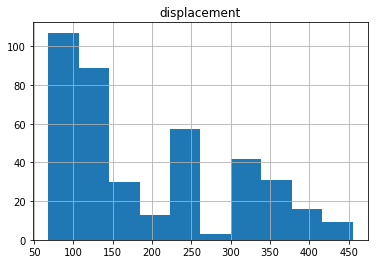

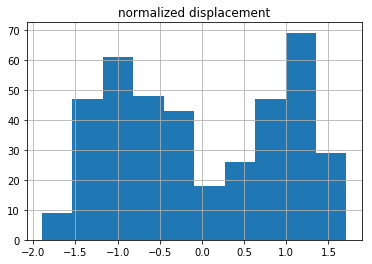

In [6]:
# Histogram of engine displacement
auto[['displacement']].hist()
plt.show()

# Plot histogram of this new feature to reveal normal-like distribution
from sklearn.preprocessing import PowerTransformer

displacement = auto[['displacement']].values.astype(float)

# Create a minimum and maximum processor object
power_trans = PowerTransformer(method = 'box-cox')

# Create an object to transform the data
displacement_norm = power_trans.fit_transform(displacement)

# Overwrite displacement with the the normalized version
auto[['displacement']] = displacement_norm

auto[['displacement']].hist()
plt.title('normalized displacement')
plt.show()

<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [7]:
# Calculate then new model
# Set the features and target
X = auto.iloc[:, 1:]

y = auto.iloc[:, :1]

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression object
regr = LinearRegression().fit(X_train,y_train)

# Predict against test set
y_pred = regr.predict(X_test)



# print intercept
print('Intercept: {}'.format(regr.intercept_[0]))
# print coeficients
names = X_train.columns

coef = {k: v for k, v in zip(names, regr.coef_.tolist()[0])}
for attribute, value in coef.items():
    print('{} : {}'.format(attribute, value))

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Comment on its performance
# The model has improved performance.  The variance score has remained .79, but the mean squared error has decreased
# from 13.11 to 12.70.

Intercept: -25.954485304330042
cylinders : 0.8590814714359025
displacement : -3.30937284655501
horsepower : -0.00539756201833444
weight : -0.004417367947021855
acceleration : -0.027839312065414516
year : 0.7714775336384696
origin : 0.04626466089397906
Mean squared error: 12.70
Variance score: 0.79


<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [8]:
auto.describe().iloc[1:3,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.515869,5.458438,1.306540e-15,104.331234,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,1.001262e+00,38.266994,847.904119,2.749995,3.690005,0.802549


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [9]:
# Center and scale
from sklearn.preprocessing import StandardScaler
# Recalculate the model
# Set target 
X = auto.iloc[:, 1:]
y = auto.iloc[:, :1]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression object
regr = LinearRegression().fit(X_train,y_train)

# Predict against test set
y_pred = regr.predict(X_test)

# print intercept
print('Intercept: {}'.format(regr.intercept_[0]))
# print coeficients
coef = {k: v for k, v in zip(names, regr.coef_.tolist()[0])}
for attribute, value in coef.items():
    print('{} : {}'.format(attribute, value))

# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Comment on its performance
# The model has the same mean square error and variance as the normalized one from the previous section.

Intercept: 23.31906531784348
cylinders : 1.459951046166019
displacement : -3.3093728465553447
horsepower : -0.20628817488513906
weight : -3.7407842452175055
acceleration : -0.07646149571858829
year : 2.8431682850158726
origin : 0.037082887967414546
Mean squared error: 12.70
Variance score: 0.79


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
